In [2]:
#Import libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("ggplot")
from matplotlib.pyplot import figure
%matplotlib inline

In [3]:
pd.set_option("display.max_rows",None)

In [4]:
#Import dataset
df = pd.read_csv("D:\Trung\Personal project\movies.csv")

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
df.shape

(7668, 15)

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#Let calculate if there is any missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
budget,2171,0.283125
gross,189,0.024648
rating,77,0.010042
company,17,0.002217
runtime,4,0.000522
score,3,0.000391
votes,3,0.000391
writer,3,0.000391
country,3,0.000391
released,2,0.000261


In [9]:
null_data = df[df["budget"].isna()]
null_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0


In [10]:
#cause budget is one of the important variable we are trying to find correlation, let's delete those empty rows
df.dropna(subset = ["budget","gross"],axis = 0,inplace = True)

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [12]:
#double check to make sure we have deleted them
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
rating,12,0.002208
company,2,0.000368
country,1,0.000184
runtime,1,0.000184
name,0,0.000000
genre,0,0.000000
year,0,0.000000
released,0,0.000000
score,0,0.000000
votes,0,0.000000


In [13]:
df.shape

(5436, 15)

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})

In [16]:
correlation_matrix = df.corr()
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


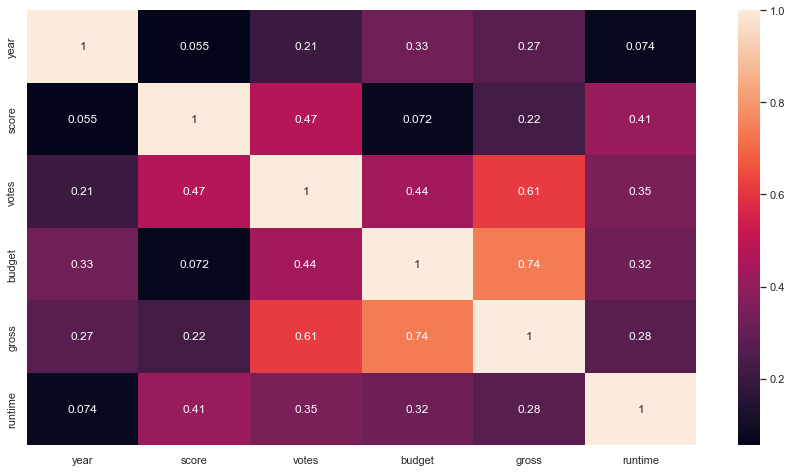

In [17]:
sns.heatmap(correlation_matrix, annot = True)
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

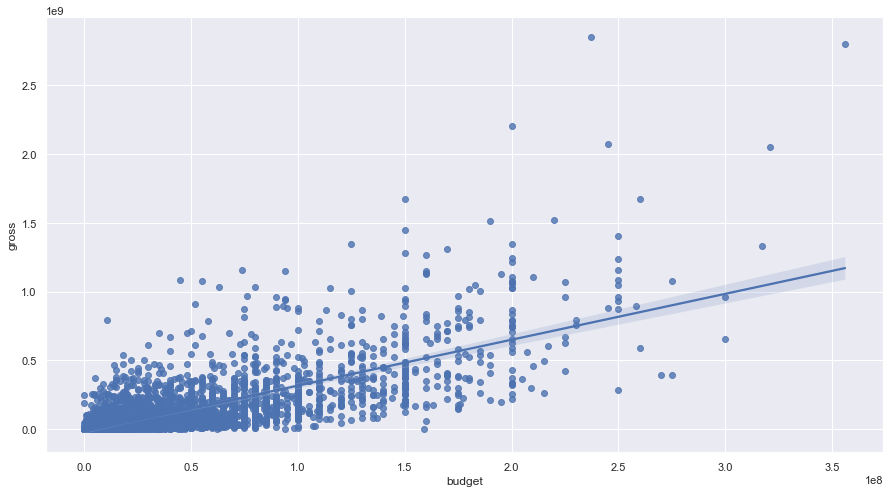

In [18]:
sns.regplot(x = df["budget"],y = df["gross"],data = df)

<AxesSubplot:xlabel='votes', ylabel='gross'>

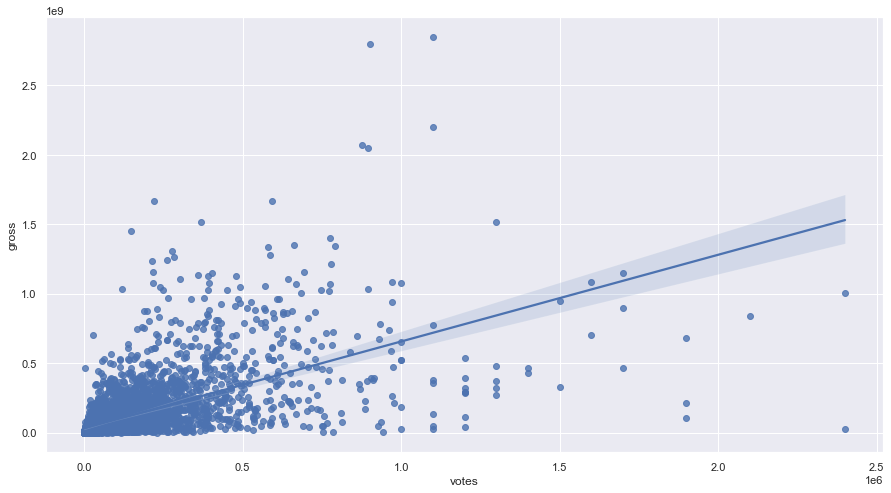

In [19]:
sns.regplot(x = df["votes"],y = df["gross"],data = df)

In [20]:
#We can see that there is a significant correlation between budget, votes with gross revenue, means the more budget, votes, 
#the higher gross revenue

In [21]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [22]:
#Now let's check the correlation between gross and categorical columns


In [23]:
a = df[df.columns]
for column in a.columns:
    if (a[column].dtype == "object"):
        a[column] = a[column].astype("category")
        a[column] = a[column].cat.codes
    
a.head()
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000.0,46998772.0,1432,146.0
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000.0,58853106.0,454,104.0
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000.0,538375067.0,949,124.0
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000.0,83453539.0,1114,88.0
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000.0,39846344.0,1089,98.0


In [24]:
matrix = a.corr()
matrix

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.023013,0.009617,0.024435,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021209,0.010800
rating,-0.023013,1.000000,0.128102,0.022668,0.018836,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239
genre,0.009617,0.128102,1.000000,-0.073026,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186
year,0.024435,0.022668,-0.073026,1.000000,-0.001481,0.055174,0.205758,-0.036936,-0.024568,-0.032770,-0.066662,0.327781,0.274264,-0.013062,0.074203
released,-0.005896,0.018836,0.021712,-0.001481,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017231,0.019888,0.008614,-0.002927,0.008619
score,0.014955,0.059550,0.034061,0.055174,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580
votes,0.012915,0.009255,-0.136457,0.205758,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437
director,0.013699,0.014847,-0.009303,-0.036936,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082
writer,0.011602,-0.006923,0.017500,-0.024568,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672
star,-0.007109,0.003737,0.002619,-0.032770,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439


<AxesSubplot:>

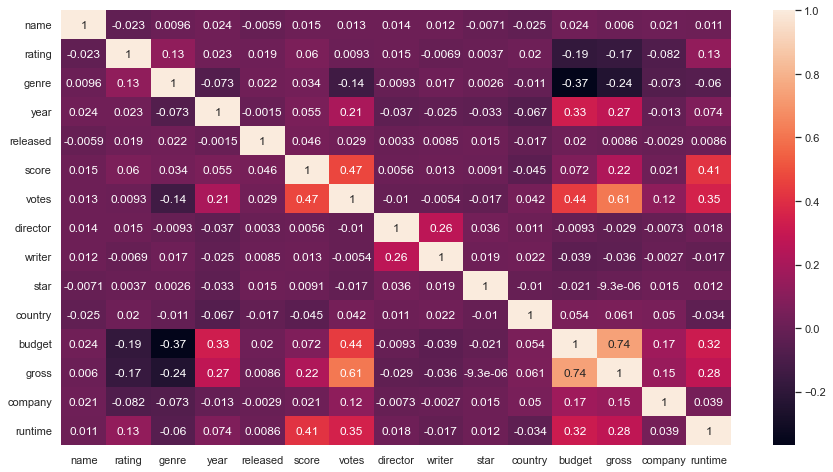

In [25]:
sns.heatmap(matrix,annot = True)

In [26]:
for i,row in matrix.iterrows():
    if i == "gross":
        print(row.sort_values(ascending = False))

gross       1.000000
budget      0.740395
votes       0.614904
runtime     0.275596
year        0.274264
score       0.222143
company     0.150233
country     0.060929
released    0.008614
name        0.005966
star       -0.000009
director   -0.029366
writer     -0.035999
rating     -0.168814
genre      -0.244380
Name: gross, dtype: float64


So we can conclude that budget and votes are most correlated with gross revenue.
Besides those, there are not variables have significant correlation with revenue

In [27]:
#Let's explore our data a little more


In [28]:
#Gross distribution
df.sort_values("gross",ascending = False).head(15)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1.670516e+09,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000.0,1.515341e+09,Universal Pictures,137.0
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1.450027e+09,Walt Disney Animation Studios,103.0


In [29]:
df_genre = df.groupby("genre").sum()
df_genre

,year,score,votes,budget,gross,runtime
genre,,,,,,
Action,2837700,8852.3,231230224.0,8.277441e+10,2.377910e+11,157474.0
Adventure,654152,2049.7,40298643.0,1.502856e+10,4.357871e+10,35678.0
Animation,557758,1861.4,41016922.0,2.114257e+10,7.787465e+10,25482.0
Biography,625666,2210.5,36103029.0,7.912580e+09,1.909662e+10,38013.0
Comedy,2992162,9261.3,107651384.0,3.411235e+10,8.851482e+10,152755.0
Crime,799971,2676.1,45399300.0,9.028556e+09,2.003291e+10,45189.0
Drama,1739464,5842.8,93326931.0,2.015284e+10,5.234112e+10,100047.0
Family,7996,26.7,692900.0,2.045000e+08,2.074333e+09,439.0
Fantasy,83850,252.2,2569000.0,7.092000e+08,1.650962e+09,4198.0


<AxesSubplot:xlabel='genre'>

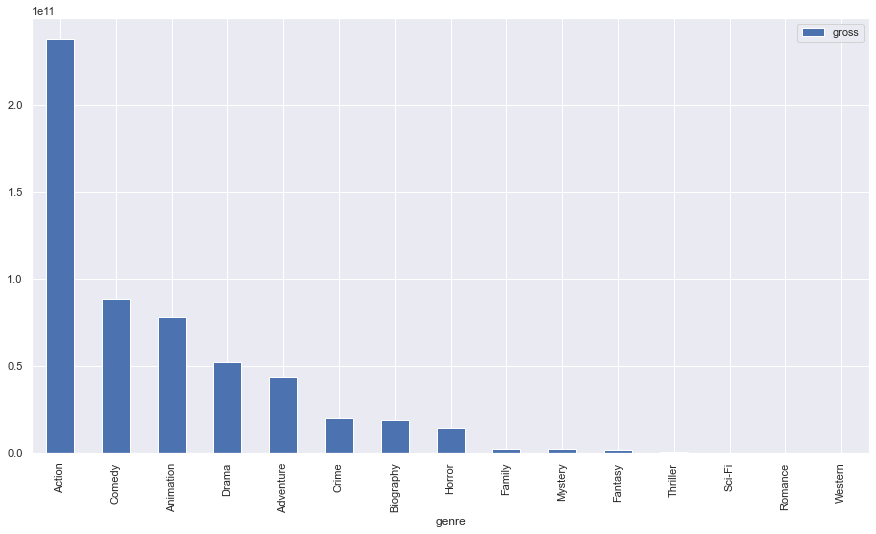

In [30]:
df_genre.sort_values("gross",ascending = False).plot(kind = "bar",y = "gross")

In [31]:
df_company = df.groupby("company").sum().sort_values("gross",ascending = False).head(15)
df_company

,year,score,votes,budget,gross,runtime
company,,,,,,
Warner Bros.,598569,1936.6,62996300.0,1.956830e+10,5.477320e+10,34520.0
Universal Pictures,660495,2116.5,49202600.0,1.598973e+10,5.124111e+10,36682.0
Columbia Pictures,604462,1908.3,39951300.0,1.551211e+10,4.235643e+10,33447.0
Paramount Pictures,557887,1779.9,42039000.0,1.372345e+10,4.002170e+10,30240.0
Twentieth Century Fox,418394,1302.7,35969815.0,1.147460e+10,3.954257e+10,22697.0
Walt Disney Pictures,214532,695.5,19873600.0,1.040470e+10,3.583365e+10,11252.0
New Line Cinema,312462,968.5,22117400.0,5.648200e+09,1.962879e+10,16737.0
Marvel Studios,24189,91.2,9286000.0,2.664000e+09,1.506559e+10,1627.0
DreamWorks Animation,56281,193.1,5549000.0,3.344000e+09,1.187361e+10,2603.0


<AxesSubplot:xlabel='company'>

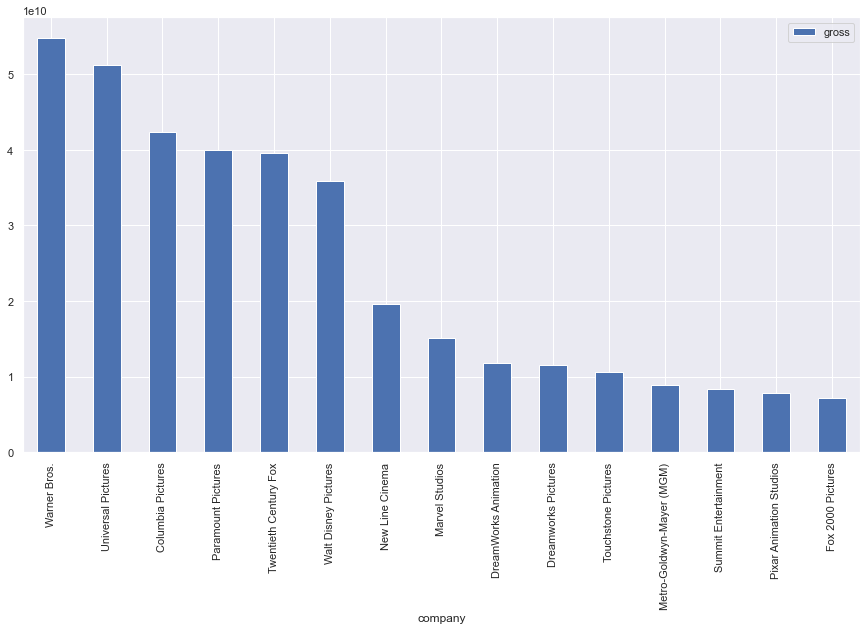

In [32]:
df_company.sort_values("gross",ascending = False).plot(kind = "bar",y = "gross")

In [33]:
df_star = df.groupby("star").sum().sort_values("gross",ascending = False).head(15)
df_star

,year,score,votes,budget,gross,runtime
star,,,,,,
Robert Downey Jr.,38132,134.1,8279700.0,2.298000e+09,1.185594e+10,2343.0
Tom Hanks,76020,269.5,12421000.0,2.292000e+09,9.899945e+09,4481.0
Tom Cruise,68033,232.9,8554200.0,2.602300e+09,9.602553e+09,4240.0
Will Smith,46159,154.3,6332000.0,2.290100e+09,7.947279e+09,2723.0
Johnny Depp,62112,215.3,8280000.0,2.698500e+09,7.410125e+09,3666.0
Daniel Radcliffe,20079,73.0,4506000.0,1.123000e+09,6.971268e+09,1336.0
Leonardo DiCaprio,40108,150.0,12027000.0,1.571500e+09,6.963368e+09,2860.0
Vin Diesel,30139,95.9,2955000.0,1.411000e+09,6.036313e+09,1740.0
Dwayne Johnson,44264,135.0,2743000.0,1.612000e+09,5.711271e+09,2403.0


<AxesSubplot:xlabel='star'>

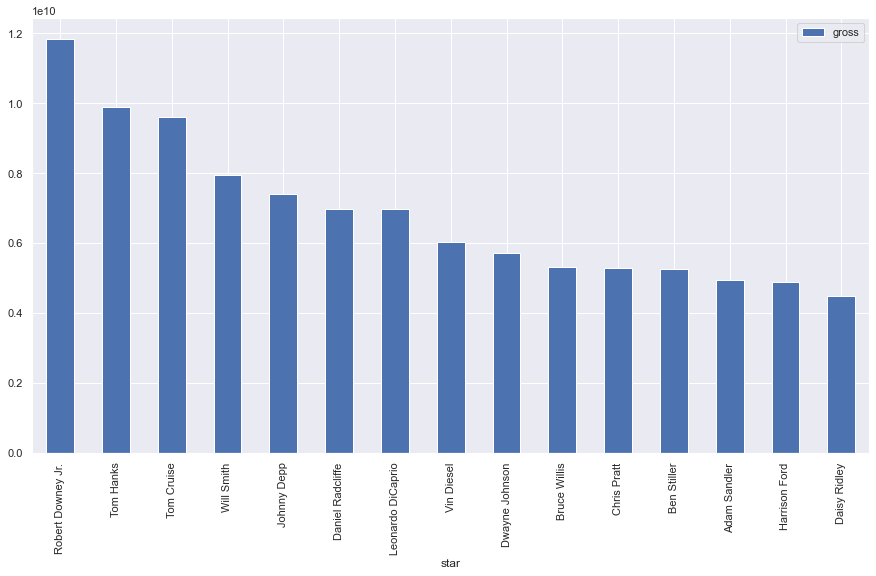

In [34]:
df_star.sort_values("gross",ascending = False).plot(kind = "bar",y = "gross")

In [35]:
df_year = df.groupby("year").sum()
df_year

,score,votes,budget,gross,runtime
year,,,,,
1980,260.4,3795865.0,4.626500e+08,1.771679e+09,4445.0
1981,398.7,2699432.0,6.929000e+08,1.838757e+09,6744.0
1982,460.3,3999721.0,8.354750e+08,2.701119e+09,7816.0
1983,503.6,3714135.0,8.876990e+08,2.321449e+09,8671.0
1984,577.3,5514764.0,1.110826e+09,3.000743e+09,9741.0
1985,613.1,5032377.0,1.208260e+09,3.233490e+09,9989.0
1986,623.4,4926589.0,1.262687e+09,2.935281e+09,10201.0
1987,646.6,5369801.0,1.366568e+09,3.357835e+09,10730.0
1988,829.6,6055443.0,1.727330e+09,4.351819e+09,13560.0


<AxesSubplot:xlabel='year'>

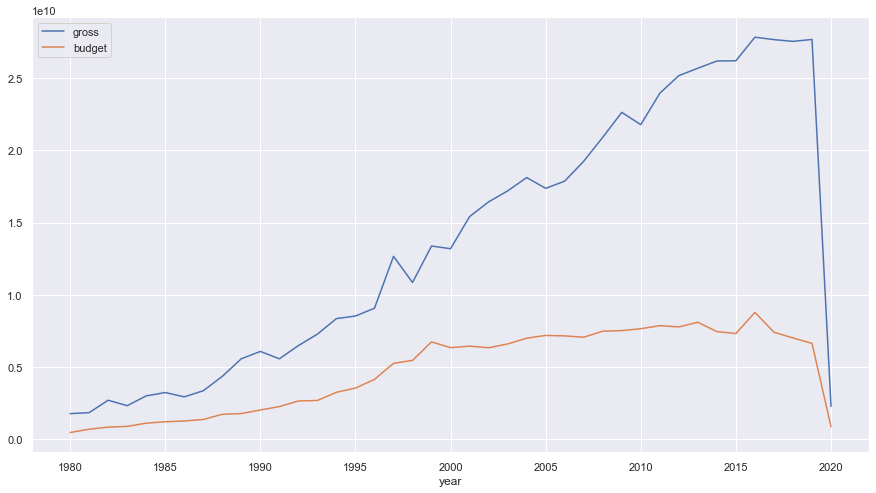

In [36]:
df_year.plot(kind = "line",y = ["gross","budget"])